# Loan Prediction Project 🏦💰

This project predicts whether a loan will be approved or not based on the applicant's information.


## Problem Statement

A bank wants to automate the loan approval process based on customer data such as income, education, employment status, and more.

Currently, loan applications are reviewed manually, which is time-consuming and prone to human error. To improve efficiency, the bank needs a machine learning model that can predict whether a loan should be approved or not.

The goal of this project is to build a model that can make accurate predictions based on historical data, helping the bank make faster and more reliable decisions.


## Importing libraries 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For prediction model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading of the data

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Understanding the data 

In [3]:
# Display basic info
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# count how many times each value appears in the Loan_Status column
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

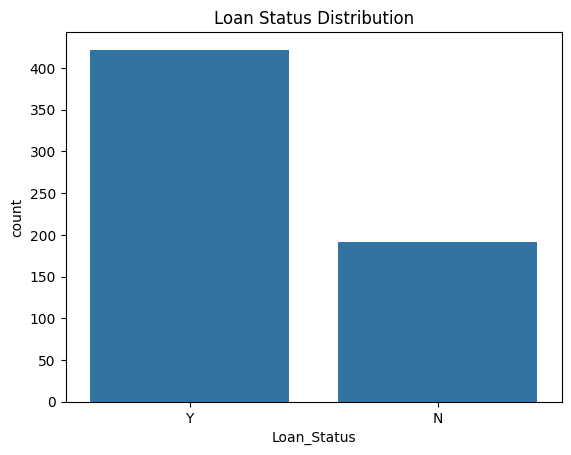

In [6]:
sns.countplot(data=df, x='Loan_Status')
plt.title("Loan Status Distribution")
plt.show()

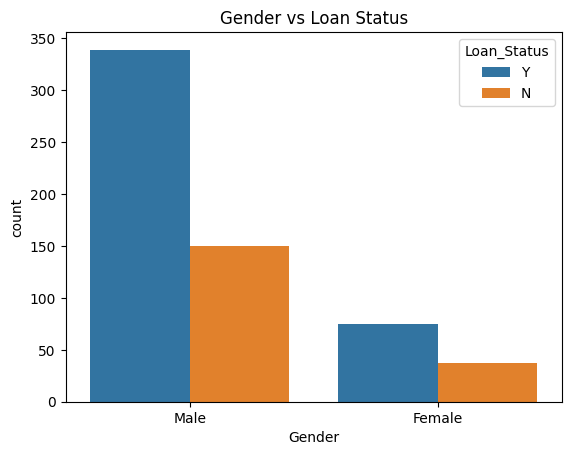

In [7]:
sns.countplot(data=df, x='Gender', hue='Loan_Status')
plt.title("Gender vs Loan Status")
plt.show()


## Data Cleaning

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
print(df.columns.tolist())

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [10]:
df.columns = df.columns.str.strip()

In [11]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [12]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# 2. Fill missing Married with the most common value
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

# 3. Fill missing Dependents with the most common value
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

# 4. Fill missing Self_Employed with the most common value
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

# 5. Fill missing LoanAmount with the median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

# 6. Fill missing Loan_Amount_Term with the most common value
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# 7. Fill missing Credit_History with the most common value
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])


In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Dependents'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Property_Area'].unique())
print(df['Loan_Status'].unique())

['Male' 'Female']
['No' 'Yes']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


In [17]:
# 1. Gender: Male = 1, Female = 0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# 2. Married: Yes = 1, No = 0
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})

# 3. Education: Graduate = 1, Not Graduate = 0
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})

# 4. Self_Employed: Yes = 1, No = 0
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})

# 5. Loan_Status: Y = 1, N = 0
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# 6. Property_Area: One-hot encode (3 categories → 3 columns)
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

# 7. Dependents: convert to numeric (keep '3+' as it is for now)
# Just to be safe, treat it as string for now


In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,False,True
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,False,False
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,False,True
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,False,True
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,False,True


In [19]:
df['Property_Area_Semiurban'] = df['Property_Area_Semiurban'].astype(int)
df['Property_Area_Urban'] = df['Property_Area_Urban'].astype(int)

In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1


In [21]:
df.shape 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Gender                   614 non-null    int64  
 2   Married                  614 non-null    int64  
 3   Dependents               614 non-null    object 
 4   Education                614 non-null    int64  
 5   Self_Employed            614 non-null    int64  
 6   ApplicantIncome          614 non-null    int64  
 7   CoapplicantIncome        614 non-null    float64
 8   LoanAmount               614 non-null    float64
 9   Loan_Amount_Term         614 non-null    float64
 10  Credit_History           614 non-null    float64
 11  Loan_Status              614 non-null    int64  
 12  Property_Area_Semiurban  614 non-null    int64  
 13  Property_Area_Urban      614 non-null    int64  
dtypes: float64(4), int64(8), o

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.781759,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.687296,0.379479,0.328990
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.463973,0.485653,0.470229
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000


<Axes: ylabel='ApplicantIncome'>

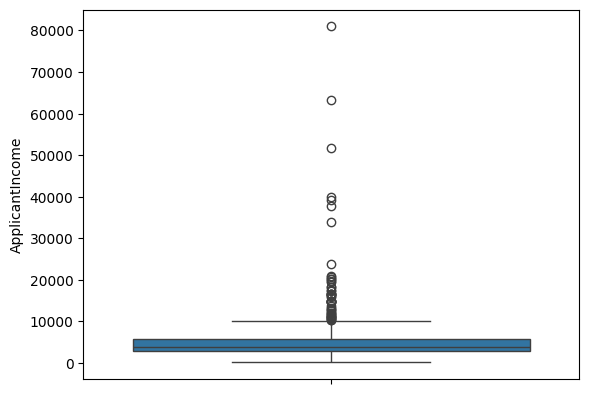

In [22]:
import seaborn as sns
sns.boxplot(df['ApplicantIncome'])

In [23]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['ApplicantIncome'] < lower_limit) | (df['ApplicantIncome'] > upper_limit)]
print(outliers)

      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
9    LP001020       1        1          1          1              0   
34   LP001100       1        0         3+          1              0   
54   LP001186       0        1          1          1              1   
67   LP001233       1        1          1          1              0   
102  LP001350       1        1          0          1              0   
106  LP001369       1        1          2          1              0   
115  LP001401       1        1          1          1              0   
119  LP001422       0        0          0          1              0   
126  LP001448       1        1         3+          1              0   
128  LP001451       1        1          1          1              1   
130  LP001469       1        0          0          1              1   
138  LP001492       1        0          0          1              0   
144  LP001508       1        1          2          1              0   
146  L

In [24]:
import numpy as np

# Handle zero safely with log1p
df['ApplicantIncome_log'] = np.log1p(df['ApplicantIncome'])
df['CoapplicantIncome_log'] = np.log1p(df['CoapplicantIncome'])
df['LoanAmount_log'] = np.log1p(df['LoanAmount'])

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,0,1,8.674197,0.000000,4.859812
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0,8.430327,7.319202,4.859812
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,1,8.006701,0.000000,4.204693
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1,7.857094,7.765993,4.795791
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1,8.699681,0.000000,4.955827


## Exploratory Data Analysis (EDA)

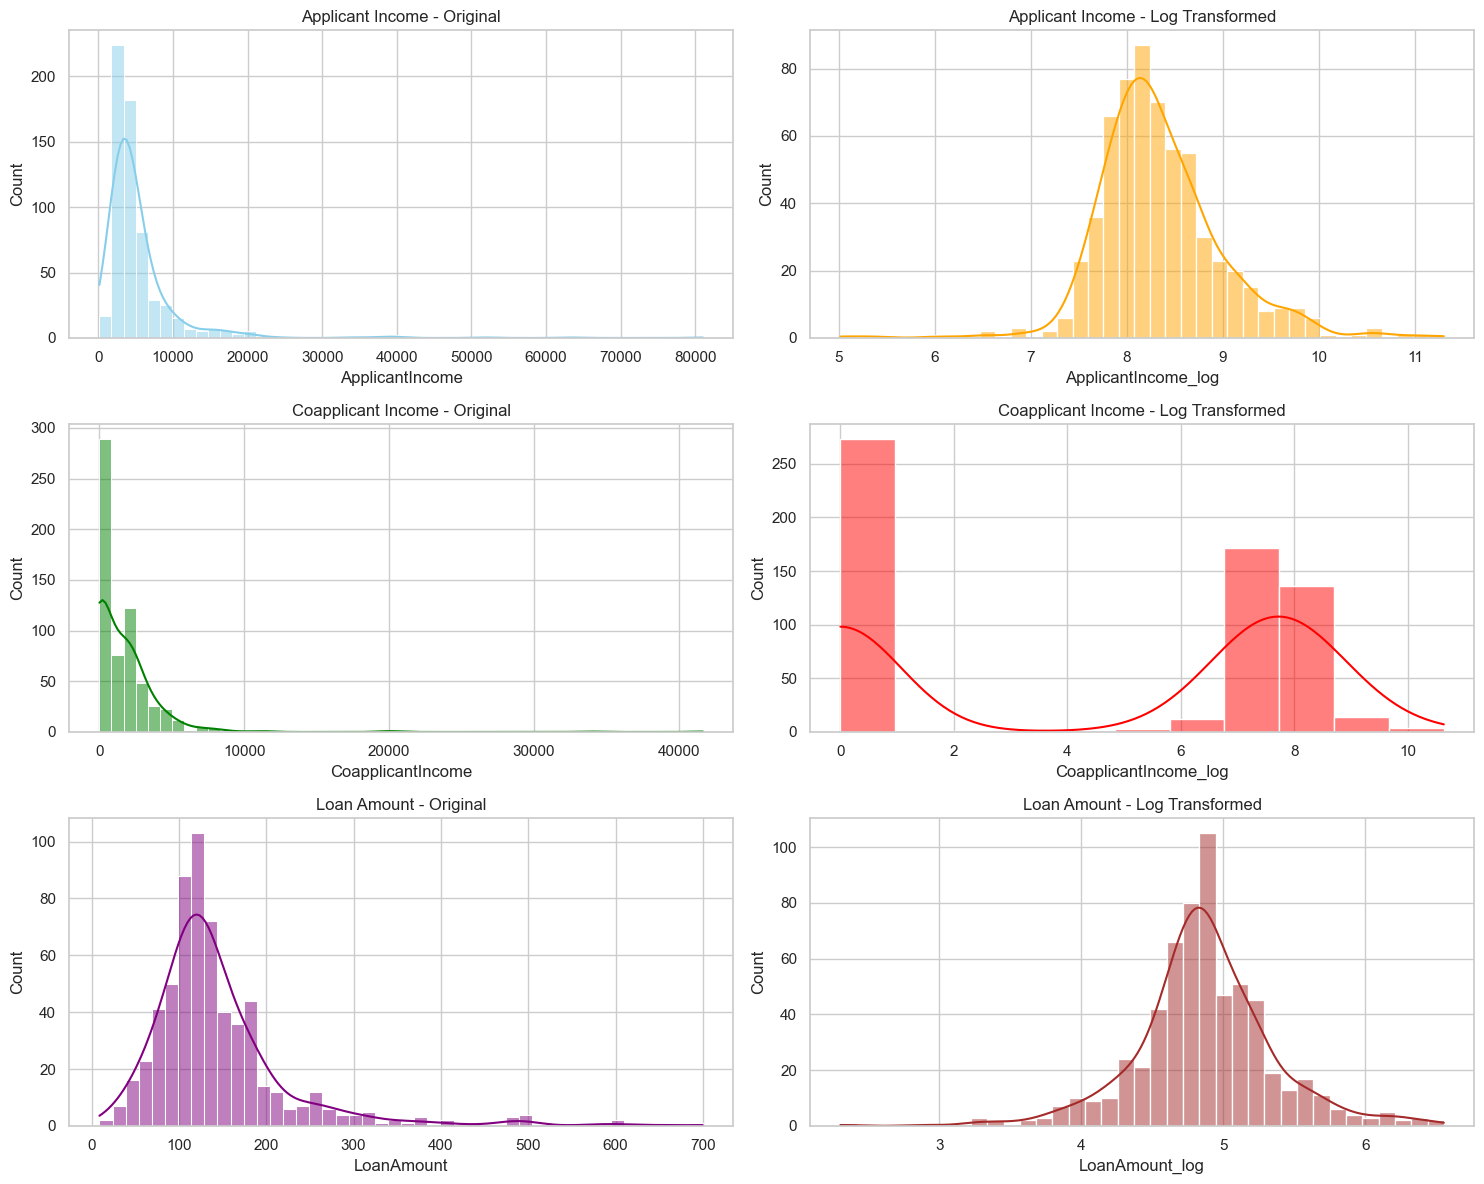

In [26]:
# Visual Comparison: Original vs Log-Transformed Distributions
# This helps to compare how log transformation affects the distribution of:
# - ApplicantIncome
# - CoapplicantIncome
# - LoanAmount
# The goal is to make the data more normally distributed (less skewed) for better model performance.


import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(15, 12))

# 1. ApplicantIncome
plt.subplot(3, 2, 1)
sns.histplot(df['ApplicantIncome'], kde=True, color='skyblue')
plt.title('Applicant Income - Original')

plt.subplot(3, 2, 2)
sns.histplot(df['ApplicantIncome_log'], kde=True, color='orange')
plt.title('Applicant Income - Log Transformed')

# 2. CoapplicantIncome
plt.subplot(3, 2, 3)
sns.histplot(df['CoapplicantIncome'], kde=True, color='green')
plt.title('Coapplicant Income - Original')

plt.subplot(3, 2, 4)
sns.histplot(df['CoapplicantIncome_log'], kde=True, color='red')
plt.title('Coapplicant Income - Log Transformed')

# 3. LoanAmount
plt.subplot(3, 2, 5)
sns.histplot(df['LoanAmount'], kde=True, color='purple')
plt.title('Loan Amount - Original')

plt.subplot(3, 2, 6)
sns.histplot(df['LoanAmount_log'], kde=True, color='brown')
plt.title('Loan Amount - Log Transformed')

plt.tight_layout()
plt.show()

C:\Users\amoug\AppData\Local\Temp\ipykernel_2200\3748958012.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=df, palette='Set2')


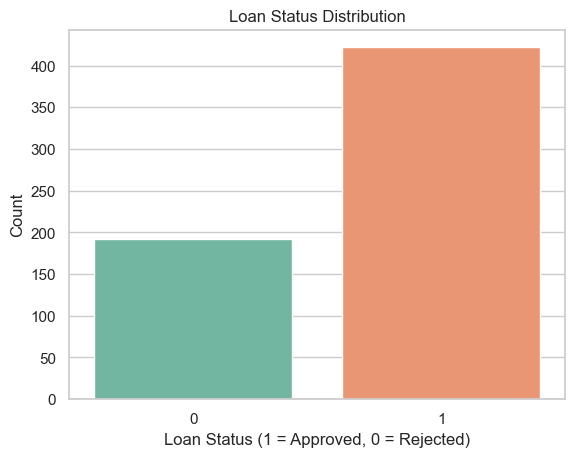

In [27]:
# Visualizing Target Variable Distribution
# Count plot showing how many loans were approved (1) and rejected (0).
# Helps to check if the dataset is balanced or imbalanced in terms of target variable.

sns.countplot(x='Loan_Status', data=df, palette='Set2')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status (1 = Approved, 0 = Rejected)')
plt.ylabel('Count')
plt.show()

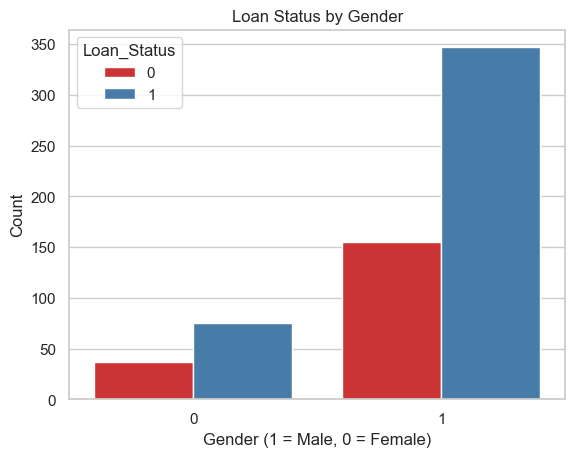

In [28]:
# 📊 Visualizing Loan Approval by Gender
# This plot shows the distribution of loan status (approved or not) across genders.
# It helps to explore whether gender plays a role in loan approval decisions.

sns.countplot(x='Gender', hue='Loan_Status', data=df, palette='Set1')
plt.title('Loan Status by Gender')
plt.xlabel('Gender (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.show()

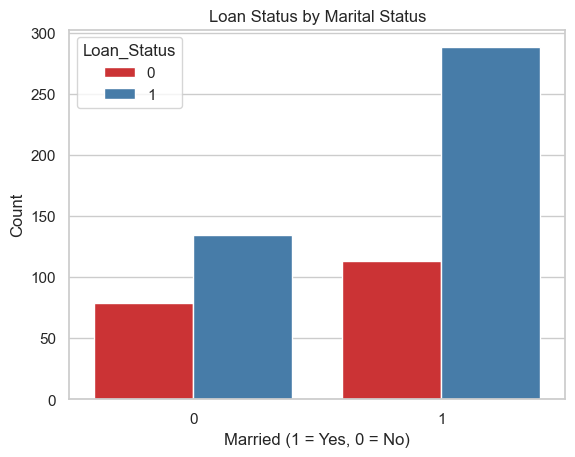

In [29]:
# 📊 Visualizing Loan Approval by Marital Status
# This plot shows the relationship between marital status and loan approval.
# It helps us understand if being married has an influence on getting a loan.


sns.countplot(x='Married', hue='Loan_Status', data=df, palette='Set1')
plt.title('Loan Status by Marital Status')
plt.xlabel('Married (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

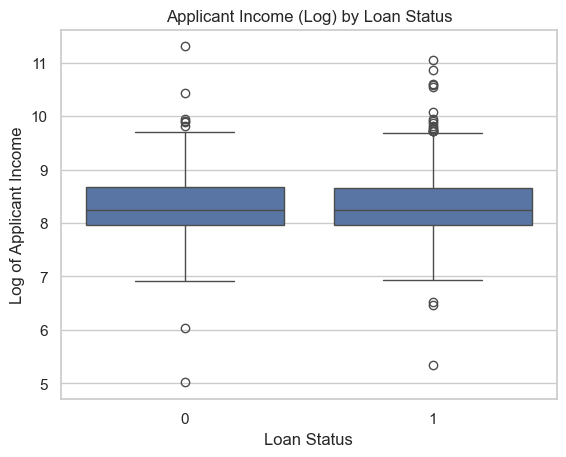

In [30]:
# 📦 Boxplot of Log-Transformed Applicant Income vs Loan Status
# This boxplot compares the distribution of applicant income (log-transformed)
# between approved and not approved loans. It helps identify differences
# in income levels and potential outliers.


sns.boxplot(x='Loan_Status', y='ApplicantIncome_log', data=df)
plt.title('Applicant Income (Log) by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Log of Applicant Income')
plt.show()

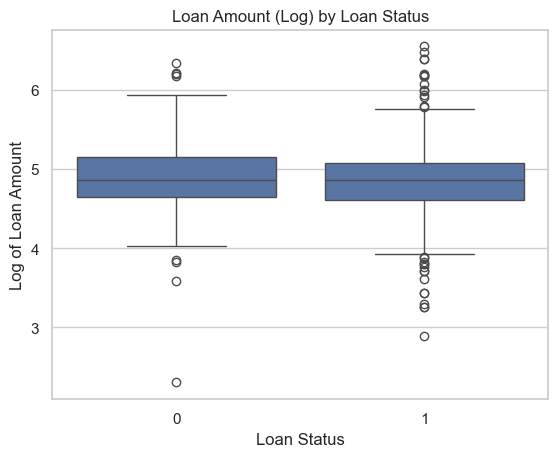

In [31]:
# 📦 Boxplot of Log-Transformed Loan Amount vs Loan Status
# This plot shows the distribution of the log-transformed loan amount 
# for approved and not approved loans. It helps to see if approved loans 
# are related to specific loan amount ranges or outliers.


sns.boxplot(x='Loan_Status', y='LoanAmount_log', data=df)
plt.title('Loan Amount (Log) by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Log of Loan Amount')
plt.show()

## Feature Engineering

In [32]:
# Feature Engineering: Creating Total Income and Log Transformed Total Income
# We create a new feature 'TotalIncome' by adding ApplicantIncome and CoapplicantIncome.
# Then, we apply a log transformation to reduce skewness and normalize the distribution.


df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log1p(df['TotalIncome']) 

In [33]:
# Feature Engineering: Creating EMI (Equated Monthly Installment)
# EMI is calculated by dividing LoanAmount by Loan_Amount_Term.
# This helps us understand the monthly loan burden on the applicant.


df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']

In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,TotalIncome,TotalIncome_log,EMI
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,0,1,8.674197,0.000000,4.859812,5849.0,8.674197,0.355556
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0,8.430327,7.319202,4.859812,6091.0,8.714732,0.355556
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,1,8.006701,0.000000,4.204693,3000.0,8.006701,0.183333
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1,7.857094,7.765993,4.795791,4941.0,8.505525,0.333333
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1,8.699681,0.000000,4.955827,6000.0,8.699681,0.391667


In [35]:
# Feature Engineering: Dropping Original Features
# We drop 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', and 'TotalIncome'
# because their log-transformed versions are more normalized and useful for modeling.


df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome'], axis=1, inplace=True)

In [36]:
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome_log',
       'CoapplicantIncome_log', 'LoanAmount_log', 'TotalIncome_log', 'EMI'],
      dtype='object')


In [37]:
df.drop(['Loan_ID'], axis=1, inplace=True, errors='ignore')

In [38]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome_log',
       'CoapplicantIncome_log', 'LoanAmount_log', 'TotalIncome_log', 'EMI'],
      dtype='object')


## Model Preparation
### Features splitting 

In [39]:
# Preparing Data for Modeling: Features and Target
# We separate the dataset into features (X) and target variable (y).
# 'Loan_Status' is our target variable.


X = df.drop('Loan_Status', axis=1)  # All features except the target
y = df['Loan_Status']               # The target column

### Train-Test-Split

In [40]:
from sklearn.model_selection import train_test_split

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (491, 14)
Testing set: (123, 14)


### Modelling 

In [41]:
# Remplacing '3+' by 3 in the column 'Dependents'
X_train['Dependents'] = X_train['Dependents'].replace('3+', 3)
X_test['Dependents'] = X_test['Dependents'].replace('3+', 3)

# Convert the whole column to whole number
X_train['Dependents'] = X_train['Dependents'].astype(int)
X_test['Dependents'] = X_test['Dependents'].astype(int)

In [42]:
from sklearn.preprocessing import StandardScaler

# Initialize the sacle
scaler = StandardScaler()

# Apply he scale to X_train to X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model with normalized data
logreg_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [43]:
### 🔹 Check Scaling Effect
# After scaling, all features in X_train_scaled should have:
# - A mean close to 0
# - A standard deviation close to 1
# This is useful to confirm that StandardScaler worked correctly.

import numpy as np

# Display mean and standard deviation of the scaled training data
print("Mean of X_train_scaled:", np.mean(X_train_scaled, axis=0))
print("Standard Deviation of X_train_scaled:", np.std(X_train_scaled, axis=0))

Mean of X_train_scaled: [ 1.08535041e-17 -1.98980909e-17 -5.42675206e-17 -1.04917206e-16
 -1.08535041e-17 -1.30242049e-16  1.70038231e-16 -5.42675206e-17
  9.40637023e-17  9.37019188e-16  9.04458676e-17  9.00840841e-16
  4.34140164e-17  1.08535041e-17]
Standard Deviation of X_train_scaled: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [44]:
### Logistic Regression Model: Training and Evaluation

# Import the model
from sklearn.linear_model import LogisticRegression

# 1. Create a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# 2. Train the model using the standardized training data
log_reg.fit(X_train_scaled, y_train)

# 3. Make predictions on the scaled test set
y_pred = log_reg.predict(X_test_scaled)

# 4. Evaluate model performance
from sklearn.metrics import accuracy_score, classification_report

# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print detailed classification report (precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7886178861788617
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



### Check for Data Imbalance because the model is good at class 1, but bad at class 0.

In [46]:
print(y_train.value_counts())


Loan_Status
1    342
0    149
Name: count, dtype: int64


### Handling Class Imbalance

In the original model, the classifier performed well on the majority class but failed to capture the minority class (loan rejected).
This indicates a class imbalance problem.  
To solve this, we use the `class_weight='balanced'` parameter in Logistic Regression, which adjusts the training process to focus more on the underrepresented class.


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression model with class weights
logreg_weighted = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg_weighted.fit(X_train_scaled, y_train)

# Make predictions
y_pred_weighted = logreg_weighted.predict(X_test_scaled)

# Evaluate the updated model
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("Classification Report:\n", classification_report(y_test, y_pred_weighted))

Accuracy: 0.7479674796747967
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.49      0.58        43
           1       0.76      0.89      0.82        80

    accuracy                           0.75       123
   macro avg       0.73      0.69      0.70       123
weighted avg       0.74      0.75      0.73       123



### Handling Class Imbalance with Decision Tree

After observing that our dataset is imbalanced (more approved loans than rejected), we previously applied class_weight='balanced' using LogisticRegression to improve fairness. Now, we are trying the same approach with a DecisionTreeClassifier. Decision Trees also support class_weight, and we want to compare its performance and see if it handles minority classes better.

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create Decision Tree with class_weight
dtree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dtree.fit(X_train, y_train)

# Predict
y_pred_tree = dtree.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))


Accuracy: 0.7479674796747967
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.56      0.61        43
           1       0.78      0.85      0.81        80

    accuracy                           0.75       123
   macro avg       0.72      0.70      0.71       123
weighted avg       0.74      0.75      0.74       123



###  Random Forest Classifier with Class Weights
We previously used Random Forest without handling class imbalance, and it gave high accuracy but poor performance on the minority class (loan not approved - Class 0).

In this step, we use `RandomForestClassifier` with `class_weight='balanced'` to give more attention to underrepresented classes, improving fairness in our predictions.


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train RandomForestClassifier with class_weight='balanced'
rf_classifier_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_classifier_balanced.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rf_balanced = rf_classifier_balanced.predict(X_test_scaled)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_rf_balanced))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_balanced))


Accuracy: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123



##  Final Evaluation & Model Comparison

I applied different machine learning models to predict loan approval:

- **Logistic Regression** (with class weights)
- **Random Forest Classifier** (with class weights)
- **Decision Tree Classifier** (with class weights)

For each model, I used class weights to handle class imbalance.

###  Summary of Model Performances:

| Model                  | Accuracy | Recall (Class 1) | Precision (Class 1) | F1 Score (Class 1) |
|------------------------|----------|------------------|---------------------|--------------------|
| Logistic Regression    | 0.75     | 0.89             | 0.76                | 0.82               |
| Random Forest          | 0.79     | 0.97             | 0.76                | 0.86               |
| Decision Tree          | 0.75     | 0.85             | 0.78                | 0.81               |

>  **Random Forest** gave the best performance overall, especially in correctly predicting approved loans (class 1).

I decided **not to use XGBoost** for now due to complexity and time, but this can be an improvement in future versions.


##  Final Conclusion

This project helped me understand and apply several important concepts in data science:

- Handling missing data and encoding categorical variables.
- Managing imbalanced classes using `class_weight='balanced'`.
- Training multiple machine learning models and comparing their results.
- Evaluating models using accuracy, precision, recall, and F1-score.

Although the dataset was imbalanced, using class weights improved the model’s ability to detect loan approvals (Class 

### 🔜 Future Improvements:
- Use XGBoost or other boosting methods.
- Perform cross-validation for more robust results.
- Improve feature engineering or try feature selection methods.



##  Thank You

Thank you for reviewing this project. I’m open to feedback and happy to continue improving my data science skills.
